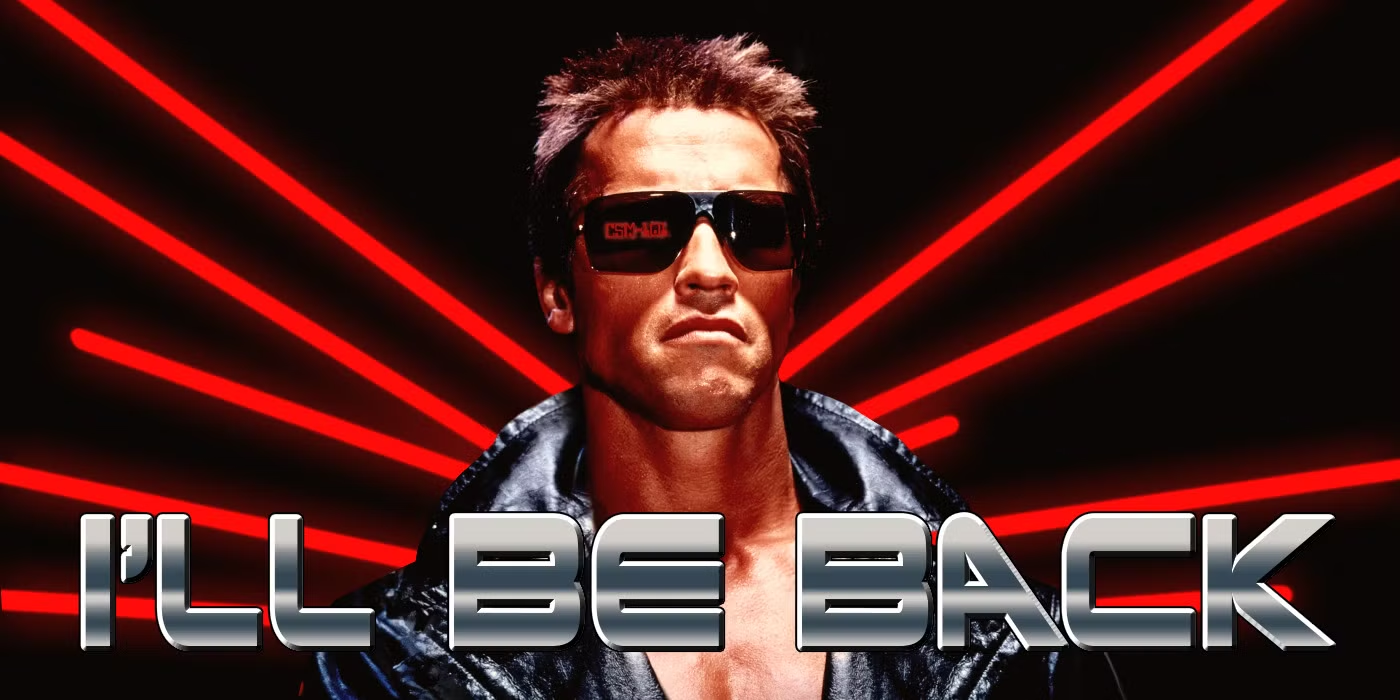

# Not Another SQL! Demo
This Jupyter Notebook demonstrates basic SQL queries on a SQLite database (`demo.db`) containing 1,000 student records. The `students` table includes columns: `id`, `first_name`, `last_name`, `age`, and `grade`.

Run the cells below to explore the data with SQL queries.

In [2]:
import sqlite3
import pandas as pd  # For nicer table output

# Connect to the database
conn = sqlite3.connect('demo.db')
cursor = conn.cursor()

# Function to run queries and display results as a DataFrame
def run_query(query):
    df = pd.read_sql_query(query, conn)
    return df

## Query 1: Total Number of Students
Count the total number of students in the `students` table.

In [3]:
query = "SELECT COUNT(*) AS total_students FROM students"
run_query(query)

,total_students
0,1000


## Query 2: Sample of Students
Display the first 10 students with all columns.

In [4]:
query = "SELECT * FROM students LIMIT 10"
run_query(query)

,id,first_name,last_name,age,grade
0,1,Skylar,Thomas,18,Distinction
1,2,Penelope,Robinson,22,Fail
2,3,Hunter,Myers,35,Fail
3,4,Claire,Parker,19,Fail
4,5,Amelia,Lewis,25,Fail
5,6,Sadie,Clark,40,High Distinction
6,7,Logan,Collins,36,Distinction
7,8,Aaron,Smith,42,Credit
8,9,Aubrey,Parker,28,Distinction
9,10,Luna,Lewis,42,Distinction


## Query 3: Students with a High Distinction
Show students who have a grade of 'High Distinction'.

In [5]:
query = "SELECT * FROM students WHERE grade = 'High Distinction'"
run_query(query)

,id,first_name,last_name,age,grade
0,6,Sadie,Clark,40,High Distinction
1,13,Aaron,Brown,41,High Distinction
2,29,Katherine,Cook,30,High Distinction
3,32,Lucy,Ramos,31,High Distinction
4,33,Jack,Robinson,22,High Distinction
...,...,...,...,...,...
264,977,Logan,Nelson,25,High Distinction
265,985,Jordan,Watson,25,High Distinction
266,990,Isaac,Smith,42,High Distinction
267,992,William,Morgan,25,High Distinction


## Query 4: Students by Grade
Count the number of students for each grade.

In [6]:
query = "SELECT grade, COUNT(*) AS count FROM students GROUP BY grade"
run_query(query)

,grade,count
0,Credit,239
1,Distinction,249
2,Fail,243
3,High Distinction,269


## Query 5: Students and Their Assigned Course
List each student and their single assigned course.

In [4]:
query = '''
    SELECT s.first_name, s.last_name, s.grade, c.course_name
    FROM students s
    JOIN courses c ON s.id = c.student_id
    LIMIT 10
'''
run_query(query)

,first_name,last_name,grade,course_name
0,Skylar,Thomas,Distinction,Physics
1,Penelope,Robinson,Fail,Mathematics
2,Hunter,Myers,Fail,Computer Science
3,Claire,Parker,Fail,Biology
4,Amelia,Lewis,Fail,Biology
5,Sadie,Clark,High Distinction,Chemistry
6,Logan,Collins,Distinction,Physics
7,Aaron,Smith,Credit,Psychology
8,Aubrey,Parker,Distinction,Physics
9,Luna,Lewis,Distinction,Art


## Query 6: Students in Specific Course
List students enrolled in the "Computer Science" course, including their grades.

In [5]:
query = '''
    SELECT s.first_name, s.last_name, s.age, s.grade, c.course_name
    FROM students s
    JOIN courses c ON s.id = c.student_id
    WHERE c.course_name = 'Computer Science'
    LIMIT 10
'''
run_query(query)

,first_name,last_name,age,grade,course_name
0,Hunter,Myers,35,Fail,Computer Science
1,Madison,Scott,20,Credit,Computer Science
2,Lucy,Ramos,31,High Distinction,Computer Science
3,Sebastian,Foster,23,Fail,Computer Science
4,Eli,Cooper,42,Credit,Computer Science
5,Claire,Robinson,18,Fail,Computer Science
6,Grayson,Howard,36,High Distinction,Computer Science
7,Michael,Cooper,32,Credit,Computer Science
8,Luke,Price,41,High Distinction,Computer Science
9,Addison,Bennett,36,Distinction,Computer Science


## Query 7: Course Enrollment Distribution
Count the number of students enrolled in each course.

In [6]:
query = '''
    SELECT course_name, COUNT(student_id) AS student_count
    FROM courses
    GROUP BY course_name
    ORDER BY student_count DESC
'''
run_query(query)

,course_name,student_count
0,Biology,116
1,Computer Science,113
2,Physics,108
3,Economics,105
4,Psychology,103
5,English Literature,102
6,Art,95
7,Mathematics,91
8,Chemistry,85
9,History,82


## Using SQL Query to Make a Plot

This code demonstrates turning a SQL query into a plot using matplotlib.

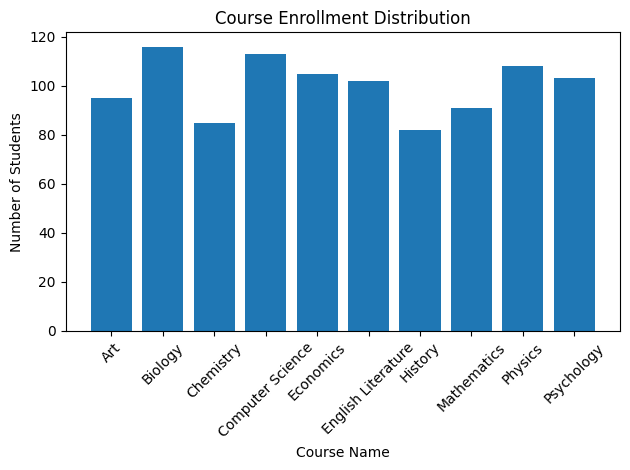

In [8]:
import matplotlib.pyplot as plt
query = "SELECT course_name, COUNT(student_id) AS student_count FROM courses GROUP BY course_name"
df = run_query(query)
plt.bar(df['course_name'], df['student_count'])
plt.xlabel('Course Name')
plt.ylabel('Number of Students')
plt.title('Course Enrollment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()